In [0]:
import pandas as pd
import numpy as np
#import math

#for plotting
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

#train test split
from sklearn.model_selection import train_test_split

#model

# for testing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score

In [0]:
df = sb.load_dataset('iris')

#df.values()
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


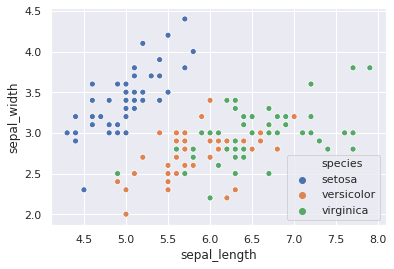

In [0]:
sb.scatterplot('sepal_length','sepal_width', data=df, hue='species')

In [0]:
X = df.iloc[:, [0, 1, 2, 3]].values

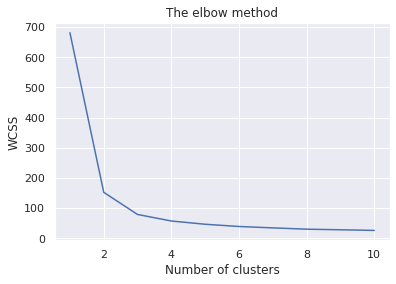

In [0]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# n_init      : Number of time the k-means algorithm will be run with different centroid seeds
# max_iter    : Maximum number of iterations of the k-means algorithm for a single run.

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [0]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

TypeError: ignored

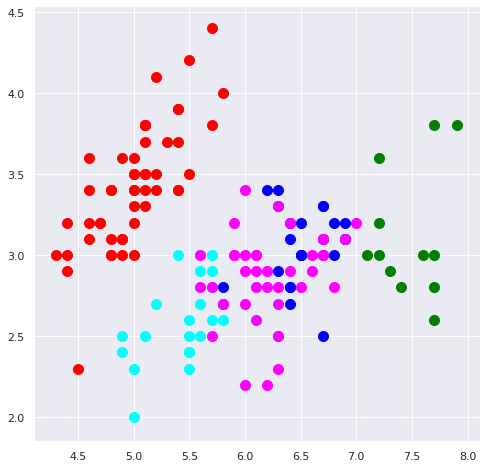

In [0]:
# Visualising the clusters
plt.figure(figsize=(8,8))

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

In [0]:
# New centroids
kmeans.cluster_centers_[:,0]


array([5.006     , 6.52916667, 7.475     , 5.508     , 6.20769231])

In [0]:
kmeans.cluster_centers_[:,1]

array([3.428     , 3.05833333, 3.125     , 2.6       , 2.85384615])